In [78]:
import os
import sys
# sys.path.append(os.path.abspath(os.path.join('../latentsae')))
# pip install -e .
# or pip install latentsae
from latentsae.sae import Sae

import torch
import h5py
import numpy as np

In [94]:
device = "cpu"

In [95]:
# model = Sae.load_from_disk("models/sae_64_32.3mq7ckj7")
model = Sae.load_from_hub("enjalot/sae-nomic-text-v1.5-FineWeb-edu-10BT", "64_32", device=device)

Fetching 2 files: 100%|██████████| 2/2 [00:00<00:00, 33420.75it/s]


In [106]:
# embedding_path = os.path.join("/Users/enjalot/latent-scope-data", "fineweb-edu-10k", "embeddings", "embedding-001.h5")
embedding_path = os.path.join("/Users/enjalot/latent-scope-data", "fineweb-edu-100k", "embeddings", "embedding-001.h5")
# embedding_path = os.path.join("/Users/enjalot/latent-scope-data", "us-federal-laws", "embeddings", "embedding-002.h5")
# embedding_path = os.path.join("/Users/enjalot/latent-scope-data", "dolly15k", "embeddings", "embedding-008.h5")
with h5py.File(embedding_path, 'r') as f:
    dataset = f["embeddings"]
    embeddings = np.array(dataset)

In [107]:
embeddings[0]

array([ 2.83088982e-02,  6.56217709e-02, -1.82387292e-01, -9.96982977e-02,
        8.22735205e-03,  8.71528015e-02, -5.40507063e-02,  2.54485458e-02,
        7.11506456e-02,  2.57746782e-02, -6.88222349e-02,  1.46031473e-02,
        9.79836583e-02,  1.45471133e-02,  4.25714180e-02, -7.68876693e-04,
        5.86299300e-02,  1.55894726e-03,  1.44025055e-03,  5.67943230e-02,
       -6.19490258e-02, -1.12687992e-02, -3.74421366e-02,  1.01137040e-02,
        7.20133260e-02,  5.33436872e-02, -6.58688694e-02, -4.12885845e-02,
       -3.78061347e-02,  4.03551981e-02, -1.45319058e-02, -3.42009068e-02,
        2.67834198e-02, -4.15060744e-02, -6.27082437e-02, -5.73392697e-02,
       -3.19288485e-03,  2.45770793e-02, -6.80648116e-03,  2.61772163e-02,
        4.27753516e-02,  1.70776993e-02, -2.90831341e-03, -3.26724090e-02,
        6.90031573e-02, -3.56149301e-02,  4.22868095e-02, -1.39518538e-02,
        3.68041806e-02,  3.96995023e-02,  5.71679398e-02, -3.15374769e-02,
        3.53350565e-02, -

In [108]:

features = model.encode(torch.from_numpy(embeddings[0]).float().to(device))

In [109]:
features

EncoderOutput(top_acts=tensor([0.2009, 0.1396, 0.1395, 0.1342, 0.1148, 0.0945, 0.0907, 0.0829, 0.0752,
        0.0679, 0.0661, 0.0599, 0.0596, 0.0539, 0.0502, 0.0466, 0.0461, 0.0437,
        0.0416, 0.0415, 0.0378, 0.0364, 0.0351, 0.0347, 0.0336, 0.0315, 0.0302,
        0.0287, 0.0286, 0.0284, 0.0277, 0.0270, 0.0262, 0.0257, 0.0253, 0.0249,
        0.0238, 0.0236, 0.0235, 0.0231, 0.0230, 0.0220, 0.0220, 0.0204, 0.0200,
        0.0199, 0.0199, 0.0194, 0.0186, 0.0186, 0.0185, 0.0184, 0.0183, 0.0181,
        0.0180, 0.0180, 0.0174, 0.0173, 0.0171, 0.0168, 0.0164, 0.0162, 0.0159,
        0.0159], grad_fn=<TopkBackward0>), top_indices=tensor([ 8944, 14943, 11176,  7583,  4941,  4000,  4919, 16225,  5983, 23917,
         9398,  7627,  9535, 18204,  7518, 16708, 19213, 22337, 10367,  2724,
         1460, 16267,  9217,  2228, 22989,  5340, 18167,  5432,  7774,  4004,
        11963, 10567,  7070, 10463, 11244,  9566,  4118, 23250, 10539,  2241,
         4769, 15618, 20645, 21214, 17483, 10935, 

In [110]:
features.top_indices

tensor([ 8944, 14943, 11176,  7583,  4941,  4000,  4919, 16225,  5983, 23917,
         9398,  7627,  9535, 18204,  7518, 16708, 19213, 22337, 10367,  2724,
         1460, 16267,  9217,  2228, 22989,  5340, 18167,  5432,  7774,  4004,
        11963, 10567,  7070, 10463, 11244,  9566,  4118, 23250, 10539,  2241,
         4769, 15618, 20645, 21214, 17483, 10935,  3523, 13444, 10181, 20740,
         3322, 12048, 13318,  1955,  2507,   312, 10078, 20104,  8118,  2390,
        19666,   397, 17107,  1374])

In [111]:
all_embeddings = torch.from_numpy(embeddings).float().to(device)

In [112]:
# Encode all embeddings at once
all_features = model.encode(all_embeddings)


In [103]:
all_features.top_indices[1]

tensor([16635,  2175,  9949,  3718, 11963, 23548, 21023,  4896, 21647,  5107,
        24305,  7448,  9598, 20701, 11211,  5659,  2998, 17820, 24077, 15053,
        12517,  4183, 17520, 12438,  1352, 17038, 22346, 14382, 24561,  4653,
        20042,  2300, 16577, 12612, 17695, 17664,  1971, 18458,  9036, 14652,
         2614, 23941, 11203,  1515, 22092,  2896, 12139, 15423,  8187, 16376,
         6812, 21945, 18230, 23832,  5919,  1538,  9038, 21064, 10567, 22698,
         2986,  2350, 20638,  5638])

In [104]:
# Convert all top_acts to a single tensor
all_top_acts = all_features.top_acts#torch.cat([feature.top_acts for feature in all_features])

# Get the max and min of top_acts across all features
max_top_acts = all_top_acts.max().item()
min_top_acts = all_top_acts.min().item()

print(f"Maximum top_acts value: {max_top_acts}")
print(f"Minimum top_acts value: {min_top_acts}")



Maximum top_acts value: 0.613632082939148
Minimum top_acts value: 0.013181308284401894


In [105]:
all_top_indices = all_features.top_indices #torch.stack([feature.top_indices for feature in all_features])

In [71]:
def get_top_activations_for_feature(feature_index, top_n=5):
    
    # Find the rows where the feature_index appears in top_indices
    feature_mask = all_top_indices == feature_index
    
    # Get the corresponding activations
    feature_activations = torch.where(feature_mask, all_top_acts, torch.tensor(0.0))
    
    # Get the top_n row indices with highest activations
    top_row_indices = torch.topk(feature_activations.max(dim=1)[0], k=top_n).indices
    
    # Get the activation values for these top rows
    top_activations = feature_activations[top_row_indices, :]
    
    return top_row_indices, top_activations



In [72]:

# Example usage:
feature_index = 0 # Example feature index (you can change this)
top_row_indices, top_activations = get_top_activations_for_feature(feature_index)

print(f"Top 5 rows for feature index {feature_index}:")
for i, (row, activation) in enumerate(zip(top_row_indices, top_activations)):
    print(f"Row {row.item()}: Activation {activation.max().item():.4f}")

Top 5 rows for feature index 0:
Row 66398: Activation 0.1603
Row 87126: Activation 0.1468
Row 19209: Activation 0.1463
Row 51702: Activation 0.1241
Row 8334: Activation 0.1228


In [73]:
def get_max_activation_per_feature(num_features):
    max_activations = torch.full((num_features,), -1.0)
    
    for feature_idx in range(num_features):
        feature_mask = all_top_indices == feature_idx
        if feature_mask.any():
            feature_activations = torch.where(feature_mask, all_top_acts, torch.tensor(0.0))
            max_activation = feature_activations.max().item()
            max_activations[feature_idx] = max_activation
    
    return max_activations



In [74]:

# Example usage:
num_features = 768 * 32  
print("num features", num_features)
max_activations_per_feature = get_max_activation_per_feature(num_features)

print("Max activation for each feature:")
print(max_activations_per_feature)

# You can also find features with no activations:
features_with_no_activation = torch.where(max_activations_per_feature == -1)[0]
print("\nFeatures with no activation:")
print(features_with_no_activation)

num features 24576
Max activation for each feature:
tensor([0.1603, 0.0837, 0.0244,  ..., 0.0489, 0.2019, 0.1133])

Features with no activation:
tensor([    4,    55,    71,  ..., 24490, 24512, 24513])


In [75]:
len(features_with_no_activation)

1289

In [76]:
activated_features = torch.where(max_activations_per_feature != -1)[0]
print("Activated features:")
len(activated_features)

Activated features:


23287

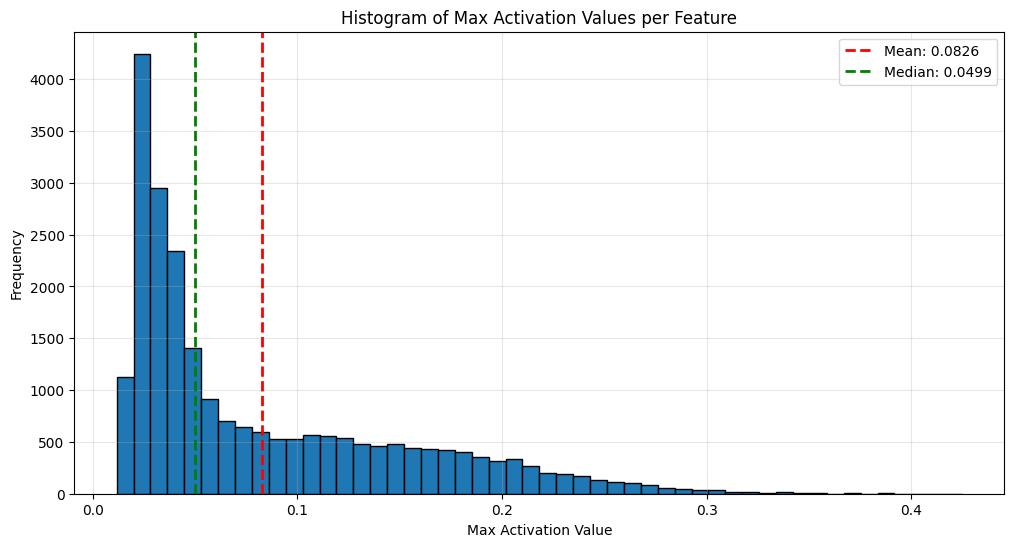

Mean activation: 0.0826
Median activation: 0.0499
Min activation: 0.0117
Max activation: 0.4249


In [77]:
# Create a histogram of activation amounts
import matplotlib.pyplot as plt

# Filter out the -1 values (features with no activation)
activated_values = max_activations_per_feature[max_activations_per_feature != -1]

plt.figure(figsize=(12, 6))
plt.hist(activated_values.numpy(), bins=50, edgecolor='black')
plt.title('Histogram of Max Activation Values per Feature')
plt.xlabel('Max Activation Value')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

# Add vertical line for mean
mean_activation = activated_values.mean()
plt.axvline(mean_activation, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean_activation:.4f}')

# Add vertical line for median
median_activation = activated_values.median()
plt.axvline(median_activation, color='g', linestyle='dashed', linewidth=2, label=f'Median: {median_activation:.4f}')

plt.legend()
plt.show()

# Print some statistics
print(f"Mean activation: {mean_activation:.4f}")
print(f"Median activation: {median_activation:.4f}")
print(f"Min activation: {activated_values.min().item():.4f}")
print(f"Max activation: {activated_values.max().item():.4f}")
